In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%pip install human-learn

     |████████████████████████████████| 116 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 9.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from hulearn.datasets import load_titanic

df = load_titanic(as_frame=True)
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [6]:
X, y = df.drop(columns=['survived']), df['survived']

In [7]:
import numpy as np
from hulearn.classification import FunctionClassifier

def fare_based(dataf, threshold=10):
    """
    The assumption is that folks who paid more are wealthier and are more 
    likely to have recieved access to lifeboats.
    """
    return np.array(dataf['fare'] > threshold).astype(int)

In [8]:
mod = FunctionClassifier(fare_based, threshold=10)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

# Note the threshold keyword argument in this function.
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

# Pay attention here, we set the threshold argument in here.
mod = FunctionClassifier(fare_based, threshold=10)

# The GridSearch object can now "grid-search" over this argument.
# We also add a bunch of metrics to our approach so we can measure.
grid = GridSearchCV(mod,
                   cv=2,
                   param_grid={'threshold': np.linspace(0, 100, 30)},
                   scoring={'accuracy': make_scorer(accuracy_score),
                           'precision': make_scorer(precision_score),
                           'recall': make_scorer(recall_score)},
                   refit='accuracy')

grid.fit(X, y);

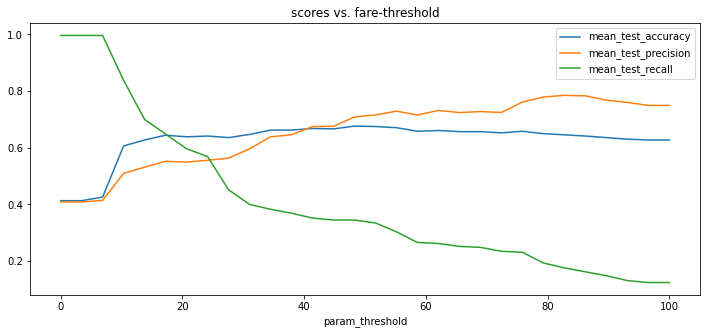

In [10]:
import pandas as pd

score_df = (pd.DataFrame(grid.cv_results_)
           .set_index('param_threshold')
           [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");

In [ ]:
import numpy as np
from hulearn.outlier import InteractiveOutlierDetector
from hulearn.classification import FunctionClassifier, InteractiveClassifier

outlier = WhatEverOutlier().fit(X, y)
classifier = WhatEverClassifier().fit(X, y)

def make_decision(dataf, treshold=0.8):
    # First we create a resulting array with all the predicitons
    res = classifier.predict(dataf)
    
    # If we detect doubt, "classify" it as a fallback instead.
    proba = classifier.predict_proba(dataf)
    res = np.where(proba.max(axis=1) < threshold, "doubt_fallback", res)
    
    # If we detect an outlier, we'll fallback too.
    res = np.where(outlier.predict(dataf) == -1, "outlier_fallback", res)
    
    # This 'res' array contains the output of the drawn diagram.
    return res

fallback_model = FunctionClassifier(make_decision, threshold=0.8)

This library offers a whole family of Function tools

- FunctionClassifier

- FunctionRegressor

- FunctionOutlierDetector


***Better Rules***

In [12]:
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

df = load_penguins(as_frame=True).dropna()
clf = InteractiveCharts(df, labels="species")

Loading BokehJS ...

In [31]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm", legend=False)

In [35]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [32]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())

In [33]:
X, y = df.drop(columns=['species']), df['species']

preds = model.fit(X, y).predict_proba(X)

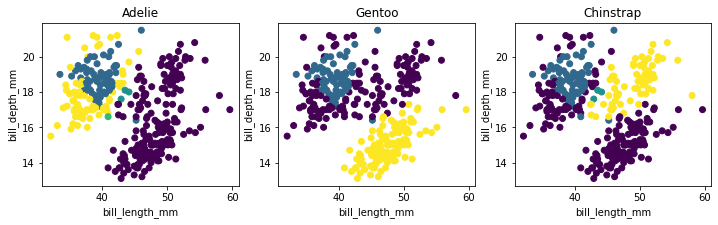

In [34]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

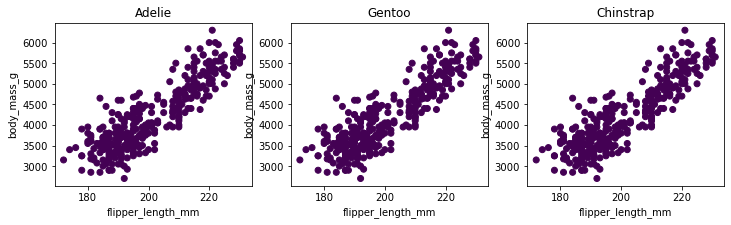

In [28]:
plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])


In this family of "drawing" models we've also got some options:
- InteractiveClassifier
- InteractiveOutlierDetector
- InteractivePreprocessor